<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/D3.csv'
sample = sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

x1 = sample.iloc[:, 0]
x2 = sample.iloc[:, 1]
x3 = sample.iloc[:, 2]
y = sample.iloc[:, 3]
m = len(x1)
n = len(y)

print('X1 = ', x1[: 5])
print('X2 = ', x2[: 5])
print('X3 = ', x3[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
X1 =  0    0.000000
1    0.040404
2    0.080808
3    0.121212
4    0.161616
Name: X1, dtype: float64
X2 =  0    3.440000
1    0.134949
2    0.829899
3    1.524848
4    2.219798
Name: X2, dtype: float64
X3 =  0    0.440000
1    0.888485
2    1.336970
3    1.785455
4    2.233939
Name: X3, dtype: float64
y =  0    4.387545
1    2.679650
2    2.968490
3    3.254065
4    3.536375
Name: Y, dtype: float64
m =  100
n =  100


In [ ]:
x0 = np.ones((m, 1))
x1 = np.array(x1).reshape(m, 1)
x2 = np.array(x2).reshape(m, 1)
x3 = np.array(x3).reshape(m, 1)

x = np.hstack((x0, x1, x2, x3))   # combining all input variables to one matrix

theta = np.zeros(len(x[0]))       # creating a theta for each input variable

In [ ]:
def compute_cost(x, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 4D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = x.dot(theta) # Output: (100,1)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(x, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(x, y, theta)

    return theta, cost_history

In [ ]:
cost = compute_cost(x, y, theta)
print('The loss of the given values of the thetas equals', cost)

alpha = 0.01
iterations = 1500

theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

The loss of the given values of the thetas equals 5.524438459196242
Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


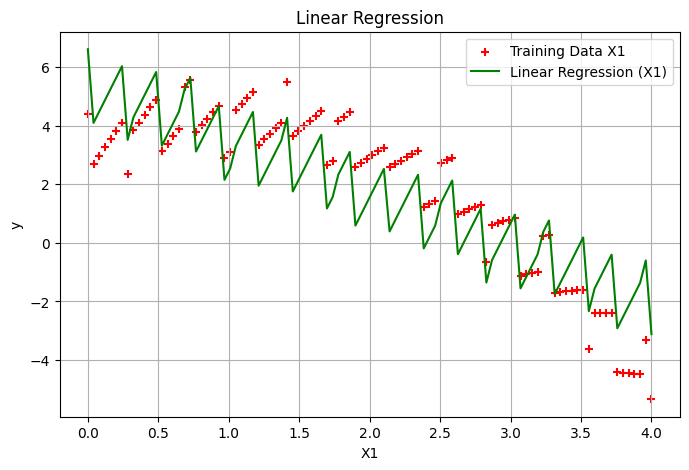

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(x[:, 1], x.dot(theta), color='green', label='Linear Regression')
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

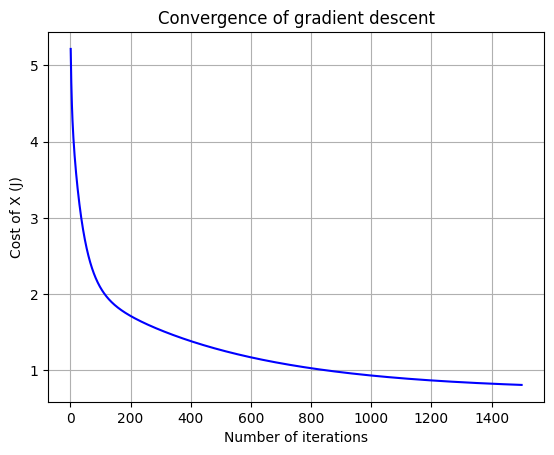

In [ ]:
plt.figure
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost of X (J)')
plt.title('Convergence of gradient descent')
# Show the plot
plt.show()

In [ ]:
x_new = np.array([[1, 1, 1, 1], [1, 2, 0 , 4], [1, 3, 2, 1]]) # new values to be solved including x0
y_pred = x_new.dot(theta) # y = x0*theta0 + x1*theta1 + x2*theta2 + x3*theta3

print('Predicted values of y =', y_pred)

[ 4.15118728 -1.8394291   0.72473856 -0.09513266]
Predicted values of y = [ 2.94136408  0.09179843 -0.01275555]
